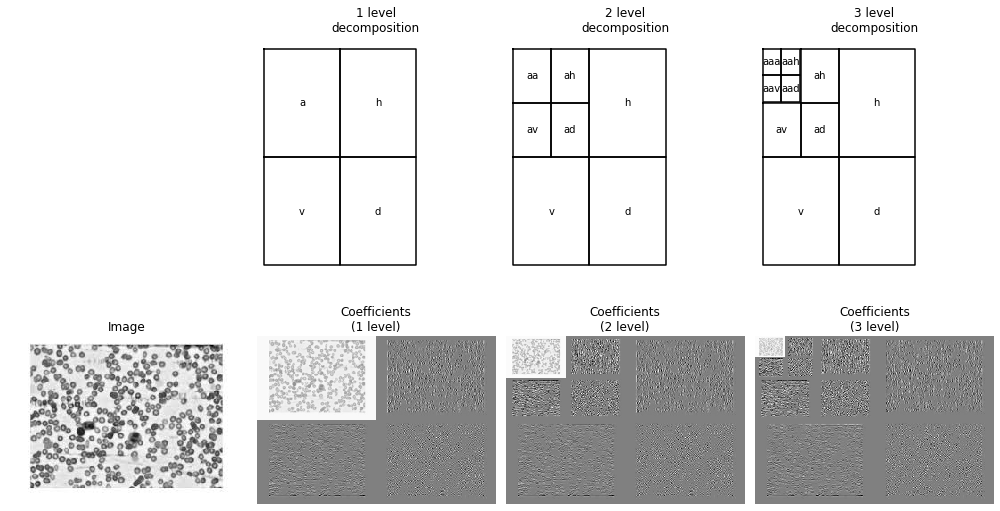

In [23]:
%matplotlib inline
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

#x = pywt.data.camera().astype(np.float32)
from skimage import color
from skimage import io

x = color.rgb2gray(io.imread('C:\\Users\\ANANYA\\Documents\\seminar\\rbc.jpg'))

shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

In [2]:
pwd()

'C:\\Users\\ANANYA'

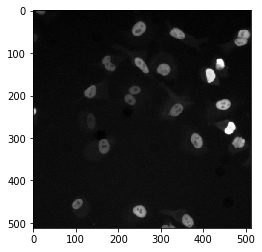

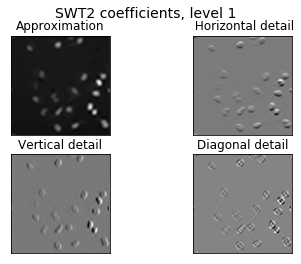

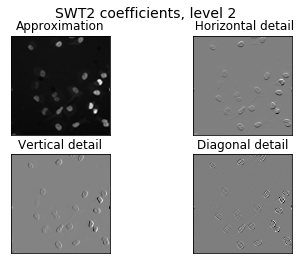

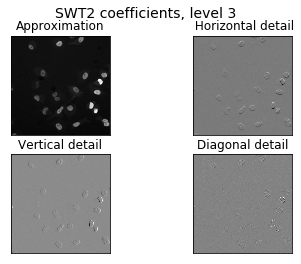

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline
import pywt
import pywt.data

from skimage import color
from skimage import io

arr = color.rgb2gray(io.imread('C:\\Users\\ANANYA\\Documents\\seminar\\antigen.jpg'))
#arr = pywt.data.ascent()


plt.imshow(arr, cmap=plt.cm.gray)

level = 1
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for LL, (LH, HL, HH) in pywt.swt2(arr, 'bior1.3', level=3, start_level=1):
    fig = plt.figure()
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, origin='image', cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=12)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

    fig.suptitle("SWT2 coefficients, level %s" % level, fontsize=14)
    level += 1


plt.show()
